In [643]:
import pandas as pd
import pyreadr
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import xgboost as xg 
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [644]:
df = pd.read_csv('../data/csv/DataFrame_pour_modeles_Lou.csv')

In [645]:
df.head()

,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,...,C5_diff,H1_diff,H3_diff,H4_diff,C8_diff,E2_diff,C4_diff,E4_diff,C7_diff,H5_diff
0,AD,2020-02-27,E,E3_diff,141399008,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
1,AD,2020-02-28,E,E3_diff,-141399008,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
2,AD,2020-03-02,H,H2_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
3,AD,2020-03-11,H,H6_diff,2,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
4,AD,2020-03-13,C,C3_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098


In [646]:
df.columns

Index(['ID', 'Date', 'PolicyFamily', 'PolicyType', 'value', 'Cases',
       'Cases_New', 'Type', 'Source', 'J-56', 'J-42', 'J-35', 'J-28', 'J-21',
       'J-14', 'J-7', 'J0', 'J7', 'J14', 'J21', 'J28', 'J35', 'J42', 'J49',
       'J56', 'd_j-7', 'i_J-7', 'i_J-14', 'i_J-21', 'i_J-28', 'i_J-35',
       'i_J-42', 'i_J-56', 'i_J7', 'i_J14', 'i_J21', 'i_J28', 'i_J35', 'i_J42',
       'i_J49', 'i_J56', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff'],
      dtype='object')

In [647]:
df['D28'] = df['J28'] -  df['J0']
df['D21'] = df['J21'] -  df['J0']
df['D14'] =  df['J14'] -  df['J0']
df['D-14'] = df['J0'] -  df['J-14']
df['D-21'] = df['J0'] -  df['J-21']
df['D-28'] = df['J0'] -  df['J-28']

# Let's start with dataviz

<AxesSubplot:xlabel='D-21', ylabel='D21'>

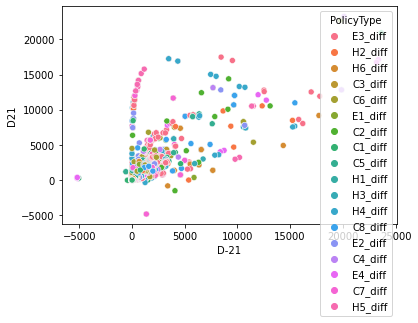

In [648]:
sns.scatterplot(x=df['D-21'],y=df['D21'],hue=df['PolicyType'])

<AxesSubplot:xlabel='D-14', ylabel='D14'>

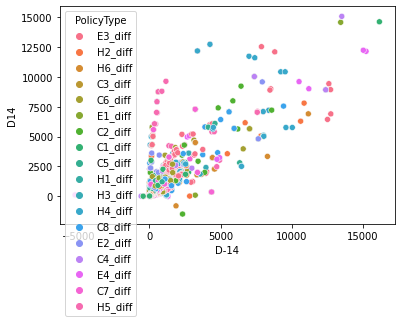

In [649]:
sns.scatterplot(x=df['D-14'],y=df['D14'],hue=df['PolicyType'])

# Model: Linear Regression 


## D-14 -> D14

In [650]:
df1 = df.copy()

In [651]:
df_model_1 = df1[['D-14', 'D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [652]:
df_model_1.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model_1.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [653]:
scaler = MinMaxScaler()
df_model_1['D-14'] = scaler.fit_transform(df_model_1[['D-14']])

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [654]:
X = df_model_1.drop(columns='D14')
y = df_model_1['D14']

In [655]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [656]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6436696849032073

In [657]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
D-14,20076.885326
H5_diff,556.729646
E4_diff,368.708199
C6_diff,323.588380
E1_diff,317.488702
C2_diff,191.566056
C8_diff,120.849636
E2_diff,97.731470
C3_diff,97.448146
C7_diff,83.835015


## Most important feature 14D

In [667]:
df_model_D14 = df1[['D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [668]:
df_model_D14.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model_D14.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [669]:
X = df_model_D14.drop(columns=['D14'])
y = df_model_D14['D14']

In [670]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [671]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.008286621283230988

In [672]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
E4_diff,1164.875977
E2_diff,62.670276
C7_diff,33.255153
E1_diff,-12.208697
C5_diff,-59.897598
C4_diff,-86.656669
C3_diff,-146.509595
C6_diff,-205.072334
C2_diff,-213.276154
C1_diff,-257.670428


##  D-21 -> D21

In [592]:
   df1 = df.copy() 

In [593]:
df_model_1_21J = df1[['D21', 'D-21', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [594]:
df_model_1_21J.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model_1_21J.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [595]:
scaler = MinMaxScaler()
df_model_1_21J['D-21'] = scaler.fit_transform(df_model_1_21J[['D-21']])

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [596]:
X = df_model_1_21J.drop(columns='D21')
y = df_model_1_21J['D21']

In [597]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [598]:
model_21=LinearRegression()
model_21.fit(X_train,y_train)
model_21.score(X_test,y_test)

0.39875408771881304

In [599]:
coeff_df = pd.DataFrame(model_21.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
D-21,26032.014518
H5_diff,1468.001180
C6_diff,704.837233
E1_diff,534.928577
C2_diff,445.059787
C4_diff,426.052124
E2_diff,354.261799
C1_diff,251.204219
C5_diff,220.958917
C7_diff,179.136483


## Most important features D21

In [600]:
df_model_1_21D = df1[['D21', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [601]:
df_model_1_21D.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model_1_21D.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [602]:
X = df_model_1_21D.drop(columns='D21')

y = df_model_1_21D['D21']

In [603]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [604]:
df_model_1_21D=LinearRegression()
df_model_1_21D.fit(X_train,y_train)
df_model_1_21D.score(X_test,y_test)

0.003826097570375775

In [605]:
coeff_df = pd.DataFrame(df_model_1_21J_.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
C1_diff,0.171680
C2_diff,0.151543
C8_diff,0.147664
H1_diff,0.132117
C6_diff,0.124784
C3_diff,0.118994
E1_diff,0.113786
C4_diff,0.110866
C5_diff,0.106757
E2_diff,0.099047


## D-28 -> D28

In [609]:
df_model_1_28J = df1[['D-28', 'D28', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [610]:
df_model_1_28J.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model_1_28J.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [613]:
scaler = MinMaxScaler()
df_model_1_28J['D-28'] = scaler.fit_transform(df_model_1_28J[['D-28']])

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [614]:
X = df_model_1_28J.drop(columns='D28')
y = df_model_1_28J['D28']

In [615]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [616]:
model_1_28J=LinearRegression()
model_1_28J.fit(X_train,y_train)
model_1_28J.score(X_test,y_test)

0.33849457883362877

In [617]:
coeff_df = pd.DataFrame(model_1_28J.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
D-28,28472.277969
E1_diff,809.010141
C6_diff,658.288891
C2_diff,649.664095
C8_diff,624.945834
C1_diff,469.156222
C3_diff,397.410558
C7_diff,313.591224
E4_diff,264.460887
E2_diff,247.464727


## Features importance D28

In [618]:
df_model_1_28J_ = df1[['D28', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [619]:
df_model_1_28J_.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model_1_28J_.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [620]:
X = df_model_1_28J_.drop(columns='D28')

y = df_model_1_28J_['D28']

In [621]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [622]:
df_model_1_28J_=LinearRegression()
df_model_1_28J_.fit(X_train,y_train)
df_model_1_28J_.score(X_test,y_test)

0.012531273928438225

In [623]:
coeff_df = pd.DataFrame(df_model_1_28J_.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
C2_diff,654.331666
E2_diff,423.209160
E4_diff,377.248735
C6_diff,376.197950
E1_diff,168.301605
C7_diff,148.436293
C3_diff,23.177343
C4_diff,15.172999
C5_diff,-120.876843
C1_diff,-324.398805


# Best lin_reg

In [624]:
df1 = df.copy()

In [625]:
df_lr = df1[['D-14', 'D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [626]:
df_lr.replace([np.inf, -np.inf], np.nan, inplace=True)
df_lr.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [627]:
scaler = MinMaxScaler()
df_lr['D-14'] = scaler.fit_transform(df_lr[['D-14']])

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [628]:
X = df_lr.drop(columns='D14')
y = df_lr['D14']

In [629]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [631]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6436696849032073

In [632]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
D-14,20076.885326
H5_diff,556.729646
E4_diff,368.708199
C6_diff,323.588380
E1_diff,317.488702
C2_diff,191.566056
C8_diff,120.849636
E2_diff,97.731470
C3_diff,97.448146
C7_diff,83.835015


# Ridge

## D-14 -> D14

In [687]:
df1 = df.copy()

In [688]:
df_ridge = df1[['D-14', 'D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [689]:
df_ridge.replace([np.inf, -np.inf], np.nan, inplace=True)
df_ridge.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [690]:
scaler = MinMaxScaler()
df_ridge['D-14'] = scaler.fit_transform(df_ridge[['D-14']])

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [691]:
X = df_ridge.drop(columns='D14')
y = df_ridge['D14']

In [692]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [693]:
from sklearn.linear_model import Ridge
from scipy.stats import uniform as sp_rand

param_grid = {'alpha': sp_rand()}

# create and fit a ridge regression model, testing random alpha values
ridge = Ridge()
rsearch = RandomizedSearchCV(estimator=ridge, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12d5ba690>})
0.711454235327578
0.21805698347531144


In [694]:
best_ridge = Ridge(alpha=rsearch.best_estimator_.alpha)
best_ridge.fit(X_train,y_train)

Ridge(alpha=0.21805698347531144)

In [695]:
best_ridge.score(X_test,y_test)

0.6462683429321017

In [696]:
coeff_df_best_ridge = pd.DataFrame(best_ridge.coef_, X.columns, columns=['Coefficient'])
coeff_df_best_ridge.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
D-14,19682.372376
H5_diff,474.893246
C6_diff,317.130198
E1_diff,304.368885
E4_diff,296.632972
C2_diff,184.443912
C8_diff,109.717914
E2_diff,95.712641
C3_diff,92.116737
C7_diff,79.891967


In [697]:
best_ridge_2 = Ridge(alpha=rsearch.best_estimator_.alpha)
best_ridge_2.fit(X_train,y_train)

Ridge(alpha=0.21805698347531144)

In [698]:
best_ridge_2.score(X_test,y_test)

0.6462683429321017

In [699]:
coeff_df_best_ridge_2 = pd.DataFrame(best_ridge_2.coef_, X.columns, columns=['Coefficient'])
coeff_df_best_ridge_2.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
D-14,19682.372376
H5_diff,474.893246
C6_diff,317.130198
E1_diff,304.368885
E4_diff,296.632972
C2_diff,184.443912
C8_diff,109.717914
E2_diff,95.712641
C3_diff,92.116737
C7_diff,79.891967


# Lasso

In [700]:
df1 = df.copy()

In [701]:
df_lasso = df1[['D-14', 'D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [702]:
df_lasso.replace([np.inf, -np.inf], np.nan, inplace=True)
df_lasso.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [703]:
scaler = MinMaxScaler()
df_lasso['D-14'] = scaler.fit_transform(df_lasso[['D-14']])

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [704]:
X = df_lasso.drop(columns='D14')
y = df_lasso['D-14']

In [705]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [706]:
from sklearn.linear_model import Lasso
from scipy.stats import uniform as sp_rand

param_grid = {'alpha': sp_rand()}

# create and fit a ridge regression model, testing random alpha values
lasso = Lasso()
rsearch = RandomizedSearchCV(estimator=lasso, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(estimator=Lasso(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12d6abf50>})
0.23238866856084311
0.0017870754763281704


In [707]:
best_lasso = Lasso(alpha=rsearch.best_estimator_.alpha)
best_lasso.fit(X_train,y_train)

Lasso(alpha=0.0017870754763281704)

In [708]:
best_lasso.score(X_test,y_test)

0.23692661190538777

In [709]:
coeff_df_best_lasso = pd.DataFrame(best_lasso.coef_, X.columns, columns=['Coefficient'])
coeff_df_best_lasso.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
D-14,0.126519
H1_diff,-0.000000
C7_diff,-0.000000
E4_diff,-0.000000
C4_diff,-0.000000
E2_diff,-0.000000
C8_diff,-0.000000
H4_diff,-0.000000
H3_diff,-0.000000
C5_diff,-0.000000


# XGboost


In [882]:
df_xgb = df1[['D-14', 'D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [883]:
df_xgb.replace([np.inf, -np.inf], np.nan, inplace=True)
df_xgb.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [884]:
scaler = MinMaxScaler()
df_xgb['D-14'] = scaler.fit_transform(df_xgb[['D-14']])

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [885]:
X = df_xgb.drop(columns='D14')
y = df_xgb['D14']

In [886]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [887]:
from xgboost import XGBRegressor
xgb_r = XGBRegressor()
xgb_r.fit(X_train, y_train)
xgb_r.score(X_test, y_test)

0.7341502725379918

In [888]:
pred = xgb_r.predict(X_test)

In [889]:
temp = pd.concat([pd.Series(y_test).reset_index(drop=True),pd.Series(pred).reset_index(drop=True)], axis=1)

In [890]:
temp.columns = ['test','pred']

In [891]:
temp.head()

,test,pred
0,323.0,336.906281
1,23.0,64.609055
2,80.0,121.541862
3,0.0,2.439635
4,33.0,54.620823


In [892]:
temp2 = temp[temp['test']!=0]

In [893]:
print(temp.shape)
print(temp2.shape)

(2316, 2)
(1885, 2)


In [894]:
import math

In [895]:
math.sqrt(np.mean((temp2.test - temp2.pred)**2))

576.4217077320052

In [896]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: %f" % (rmse))

RMSE: 520.044923


## XGBoost model tuning

In [903]:
xgb1 = XGBRegressor()
parameters = { 'objective':['reg:linear'],
                    'learning_rate': [0.045,0.05,0.06], 
                    'max_depth': [3,4,5],
                    'min_child_weight': [2,3,4],
                    'silent': [1],
                    'subsample': [0.5,0.55,0.6],
                    'colsample_bytree': [0.7,0.8,0.85],
                    'n_estimators': [650,750,800]}

xgb_grid = GridSearchCV(xgb1,
                            parameters,
                            scoring='neg_mean_squared_error', #this line can be commented to use XGB's default metric
                            cv = 5,
                            n_jobs = -1,
                            verbose=True)


xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 81.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 144.1min
[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed: 154.1min finished


[19:54:03] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:54:05] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.85

In [908]:
best_estim = xgb_grid.best_estimator_

In [910]:
best_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.045, max_delta_step=0, max_depth=5,
             min_child_weight=4,  monotone_constraints='()',
             n_estimators=650, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.6, tree_method='exact',
             validate_parameters=1, verbosity=None)

best_xgb.fit(X_train,y_train)

[20:27:35] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:27:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:27:38] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.045, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=650, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.6, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [911]:
best_xgb.score(X_test, y_test)

0.7489218848583479

# RandomForestRegressor

In [736]:
df1 = df.copy()

In [737]:
df_rf = df1[['D-14', 'D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [738]:
df_rf.replace([np.inf, -np.inf], np.nan, inplace=True)
df_rf.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [739]:
scaler = MinMaxScaler()
df_bag['D-14'] = scaler.fit_transform(df_bag[['D-14']])

In [740]:
X = df_rf.drop(columns='D14')
y = df_rf['D14']

In [741]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [743]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100)

RF.fit(X_train,y_train)

RF.score(X_test,y_test)

0.7229419211722845

In [ ]:
# les features expliquent 72% de la variance de ma target

# Neural Network

In [849]:
df1 = df.copy()

In [850]:
df_nn = df1[['D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [851]:
df_nn.replace([np.inf, -np.inf], np.nan, inplace=True)
df_nn.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [853]:
X = df_nn.drop(columns='D14')
y = df_nn['D14']

In [854]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [855]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [860]:
def initialize_model():

    ### Model architecture
    model = Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=18))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation="linear"))
    
    
    # Model optimization : Optimized, loss and metric to 
    model.compile(optimizer='adam',
                  loss='mse',       # MSE stands for Mean Square Error
                  metrics=['mae'])  # MAE stands for Mean Absolute Error
    
    return model


model = initialize_model()

In [861]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                1216      
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 33        
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [862]:
def plot_loss_mae(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    

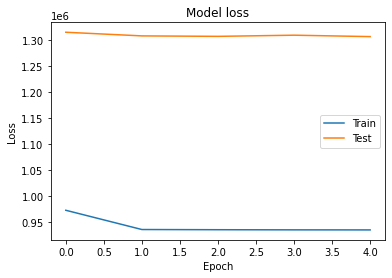

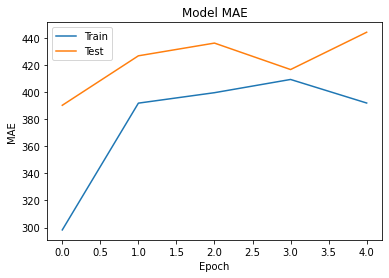

In [863]:
model = initialize_model()

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=5,
                    batch_size=16,
                    verbose=0)

plot_loss_mae(history)